### Ejemplo probabilidad COVID

Supongamos que tenemos una población donde 5 de cada 1000 personas están infectadas.


Pintar una curva donde se represente en el eje Y la probabilidad de encontrar **exactamente dos contagiados** en función del número de personas dado por el eje X

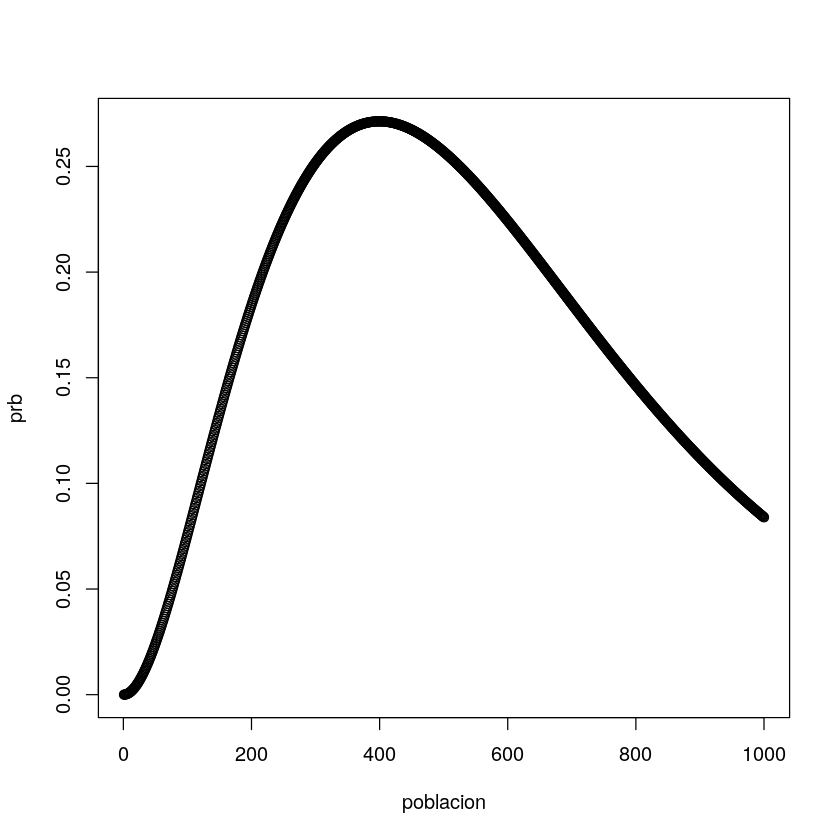

In [4]:
p <- 5/1000
poblacion <- 1:1000

prb <- dbinom(x=2, size=poblacion, prob=p)
plot(poblacion, prb)

Pintar una curva donde se represente en el eje Y la probabilidad de encontrar **al menos un contagiado** en función del número de personas dado por el eje X

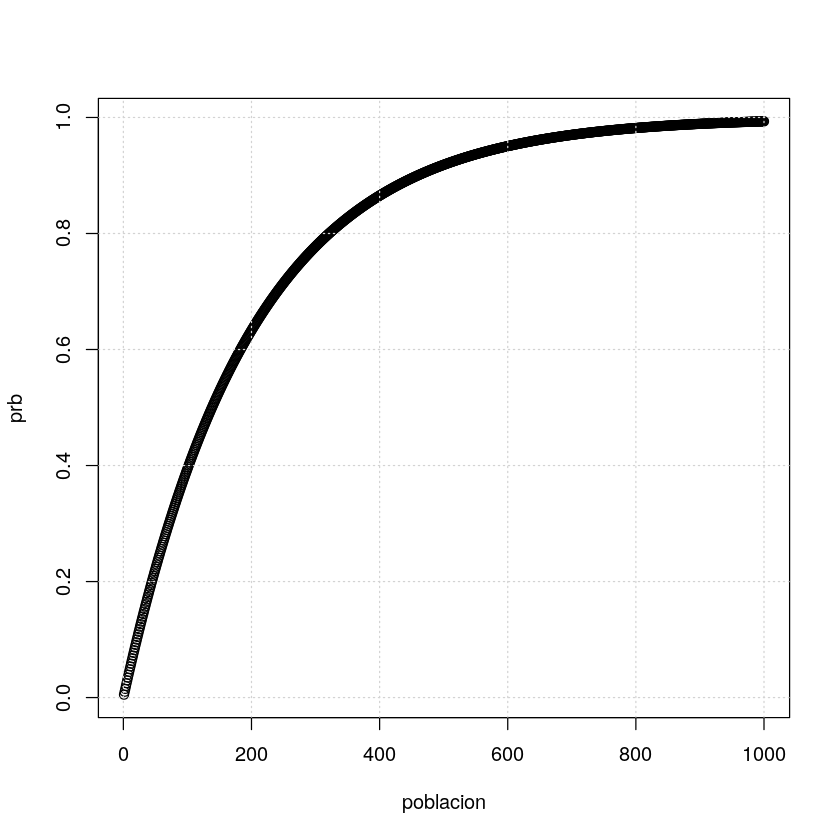

In [7]:
prb <- 1 - dbinom(x=0, size=poblacion, prob=p)
plot(poblacion, prb)
grid()

Pintar una curva donde se represente en el eje Y la probabilidad de encontrar **dos o más contagiados** en función del número de personas dado por el eje X

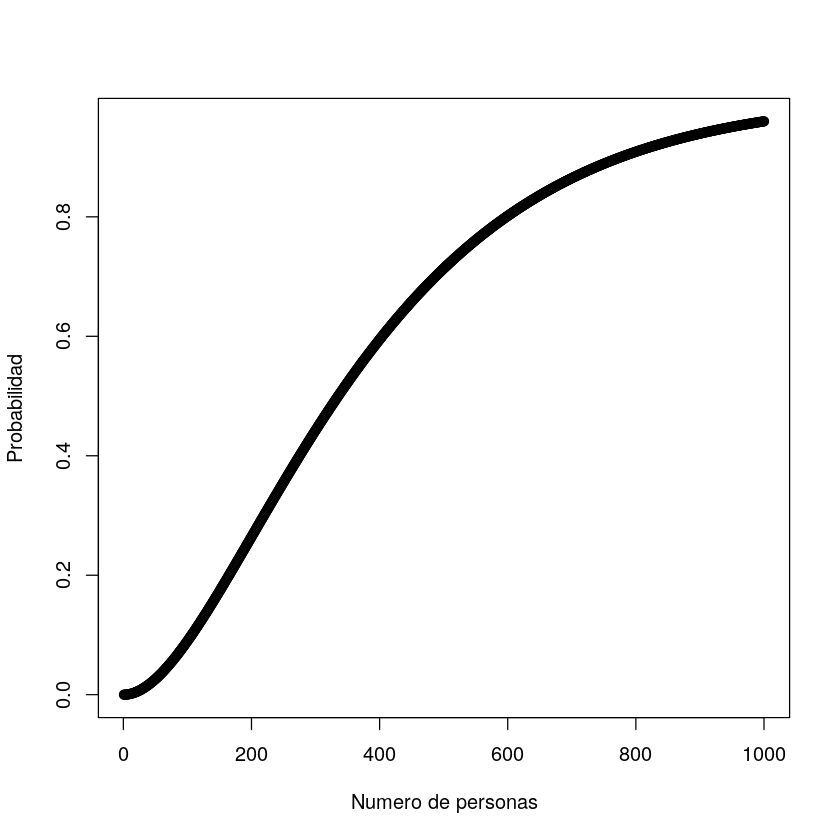

In [9]:
prb <- 1-pbinom(q=1,size=poblacion, prob=p)
plot(poblacion, prb, xlab='Numero de personas', ylab='Probabilidad')

 ## CSV edad española
 
Usando el CSV del INE.¿Cual es la media de edad de la población española? ¿y la mediana? ¿la moda?

La media se puede calcular como: 
\\[ 
    \bar{x} =  \frac{1}{\text{poblaciónTotal}} \sum _{i=1}^N edad_i · poblaciónConEdad_i 
\\]

In [10]:
library(dplyr)
library(tidyr)

poblacion_raw<-read.csv("data/9663bsc.csv",skip=0,fileEncoding="ISO-8859-1",header=T, sep=';',stringsAsFactor=F)
poblacion_raw$Total <- as.numeric(gsub('\\.','',poblacion_raw$Total))
poblacion <- poblacion_raw %>% pivot_wider(names_from = Sexo, values_from = Total)  %>% 
 mutate(edad=as.numeric(gsub("año(s|)","",Edad.simple))) %>% drop_na() %>% select(-c(Periodo,Edad.simple)) %>% arrange(edad)

head(poblacion)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Ambos sexos,Hombres,Mujeres,edad
<dbl>,<dbl>,<dbl>,<dbl>
336996,173932,163064,0
345229,176803,168426,1
366740,188571,178169,2
384949,197802,187147,3
411364,211875,199489,4
434157,223201,210956,5


Calculamos la moda:

In [48]:
paste("La edad más común es:",
      poblacion$edad[which.max(poblacion$`Ambos sexos`)],"años")

[1] "La edad más común es: 45 años"

Calculamos la media:

\\[ 
    \bar{x} =  \frac{1}{\text{poblaciónTotal}} \sum _{i=1}^N edad_i · poblaciónConEdad_i 
\\]

In [37]:
paste("La media de la población española es:",
round(sum(poblacion$`Ambos sexos`*poblacion$edad)/sum(poblacion$`Ambos sexos`),2))


[1] "La media de la población española es: 43.57"

Calculamos la mediana

In [38]:
pob <- poblacion$`Ambos sexos`
pob

[1] 336996 345229 366740 384949 411364 434157 446085 452922 448098 472123
 [11] 489170 493788 503582 529724 512290 510170 501335 498642 495262 483563
 [21] 486987 491756 485914 477805 486054 485134 488423 496667 514626 530040
 [31] 527170 534917 542549 551078 557450 570798 589814 612152 632168 667840
 [41] 697282 731094 752807 786596 797066 811351 805548 799303 779884 776130
 [51] 763589 751773 743716 735940 739057 719825 712912 719962 683622 658512
 [61] 641294 641282 621113 603717 586634 544912 525640 499244 495808 489651
 [71] 454968 440794 452461 467039 421088 396212 406352 378666 364064 306813
 [81] 274315 324586 207237 223441 237657 245157 219799 199923 184260 162621
 [91] 134131 115558  90316  73226  54095  42336  31058  22590  15942  11018
[101]   5514   3405   2065   1228    814

In [39]:
cumsum(pob)

[1]   336996   682225  1048965  1433914  1845278  2279435  2725520  3178442
  [9]  3626540  4098663  4587833  5081621  5585203  6114927  6627217  7137387
 [17]  7638722  8137364  8632626  9116189  9603176 10094932 10580846 11058651
 [25] 11544705 12029839 12518262 13014929 13529555 14059595 14586765 15121682
 [33] 15664231 16215309 16772759 17343557 17933371 18545523 19177691 19845531
 [41] 20542813 21273907 22026714 22813310 23610376 24421727 25227275 26026578
 [49] 26806462 27582592 28346181 29097954 29841670 30577610 31316667 32036492
 [57] 32749404 33469366 34152988 34811500 35452794 36094076 36715189 37318906
 [65] 37905540 38450452 38976092 39475336 39971144 40460795 40915763 41356557
 [73] 41809018 42276057 42697145 43093357 43499709 43878375 44242439 44549252
 [81] 44823567 45148153 45355390 45578831 45816488 46061645 46281444 46481367
 [89] 46665627 46828248 46962379 47077937 47168253 47241479 47295574 47337910
 [97] 47368968 47391558 47407500 47418518 47424032 47427437 47429502 47430730
[105] 47431544

In [40]:
cumsum(pob)/sum(pob)

[1] 0.007104892 0.014383361 0.022115346 0.030231232 0.038904026 0.048057365
  [7] 0.057462182 0.067011143 0.076458401 0.086412178 0.096725356 0.107135897
 [13] 0.117752924 0.128921104 0.139721722 0.150477644 0.161047298 0.171560175
 [19] 0.182001792 0.192196758 0.202463913 0.212831613 0.223076145 0.233149716
 [25] 0.243397200 0.253625288 0.263922718 0.274393956 0.285243824 0.296418666
 [31] 0.307533000 0.318810663 0.330249232 0.341867619 0.353620346 0.365654489
 [37] 0.378089547 0.390995558 0.404323566 0.418403647 0.433104455 0.448518121
 [43] 0.464389563 0.480973379 0.497777934 0.514883661 0.531867042 0.548718760
 [49] 0.565161067 0.581524228 0.597622987 0.613472629 0.629152405 0.644668240
 [55] 0.660249791 0.675425873 0.690456208 0.705635178 0.720047992 0.733931411
 [61] 0.747451822 0.760971981 0.774066916 0.786795091 0.799163105 0.810651494
 [67] 0.821733570 0.832259140 0.842712268 0.853035587 0.862627685 0.871920952
 [73] 0.881460195 0.891306785 0.900184590 0.908537934 0.917105060 0.925088481
 [79] 0.932764048 0.939232592 0.945015979 0.951859231 0.956228412 0.960939222
 [85] 0.965949749 0.971118397 0.975752423 0.979967403 0.983852160 0.987280701
 [91] 0.990108587 0.992544898 0.994449032 0.995992857 0.997133342 0.998025913
 [97] 0.998680709 0.999156975 0.999493080 0.999725373 0.999841624 0.999913412
[103] 0.999956948 0.999982838 1.000000000

In [41]:
poblacion$percentil <- cumsum(pob)/sum(pob)

In [43]:
head(poblacion)

Ambos sexos,Hombres,Mujeres,edad,percentil
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
336996,173932,163064,0,0.007104892
345229,176803,168426,1,0.014383361
366740,188571,178169,2,0.022115346
384949,197802,187147,3,0.030231232
411364,211875,199489,4,0.038904026
434157,223201,210956,5,0.048057365


In [42]:
poblacion[40:50,]

Ambos sexos,Hombres,Mujeres,edad,percentil
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
667840,331190,336650,39,0.4184036
697282,346948,350334,40,0.4331045
731094,364071,367023,41,0.4485181
752807,375616,377191,42,0.4643896
786596,394116,392480,43,0.4809734
797066,401318,395748,44,0.4977779
811351,407732,403620,45,0.5148837
805548,406145,399403,46,0.5318670
799303,401994,397309,47,0.5487188


In [47]:
idx<-which.min(abs(poblacion$percentil-0.5))
poblacion[idx,]

Ambos sexos,Hombres,Mujeres,edad,percentil
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
797066,401318,395748,44,0.4977779


# Origen de la vida

Datos basados en:
* [Life Before Earth](https://arxiv.org/pdf/1304.3381.pdf)
* [Genome increase as a clock for the origin and evolution of life](https://biologydirect.biomedcentral.com/track/pdf/10.1186/1745-6150-1-17?site=biologydirect.biomedcentral.com)


La siguiente tabla muestra la complejidad de ADN, eliminando las redundancias, de diferentes grupos de animales y su aparición en la tierra:

| especies | genoma completo | genoma sin redundancia | aparición |
| - | - | - | - |
| mamíferos | $3.2 · 10^9$pb | $4.8 · 10^8$pb | 125 ma |
| peces     | $4.8 · 10^8$pb | $1.6 · 10^8$pb | 500 ma |
| gusanos   | $9.7 · 10^7$pb | $7.2 · 10^7$pb | 1000ma |
| eucariotas| $2.9 · 10^6$pb | $2.9 · 10^6$pb | 2100ma |
| procariotas|$5 · 10^5$pb   | $5 · 10^5$pb   | 3500ma |


Las columnas significan:
* especies: especies de animales.
* genoma completo: Longitud del genoma de una especie medido en pares de bases de ADN.
* genoma completo: Longitud del genoma de una especie, eliminando la redundancia, medido en pares de bases de ADN.
* aparición: Cuando ese conjunto de especies aparecieron.

Con estos datos tratar de obtener una regresión que indique cuando apareció un organismo con solo 1 par de bases genéticas. Esto podría marcar el origen de la vida.

¿Qué columna habría que coger para hacer la regresión la del genoma completo o el que elimina la redundancia?

Ayuda: Es mejor usar escalas logarítmicas.

In [49]:
df<-data.frame(especie=c("mamíferos","peces","gusanos","eucariotas","procariotas"),
           gen_total=c(3.2e9,4.8e8,9.7e7,2.9e6,5e5),
          gen_reduc=c(4.8e8,1.6e8,7.2e7,2.9e6,5e5),
          aparicion=c(-125,-500,-1000,-2100,-3550))

In [50]:
df

especie,gen_total,gen_reduc,aparicion
<chr>,<dbl>,<dbl>,<dbl>
mamíferos,3.2e+09,4.8e+08,-125
peces,4.8e+08,1.6e+08,-500
gusanos,9.7e+07,7.2e+07,-1000
eucariotas,2.9e+06,2.9e+06,-2100
procariotas,5.0e+05,5.0e+05,-3550


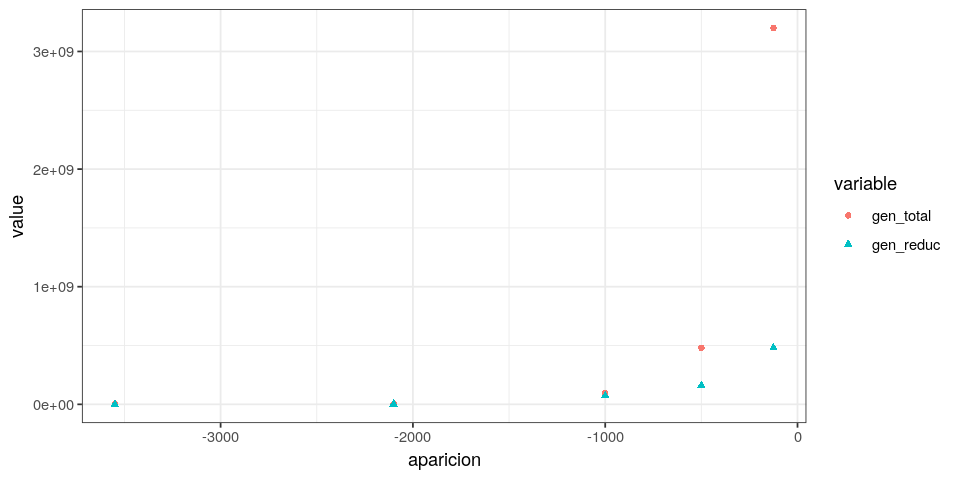

In [52]:
library(ggplot2)
library(reshape2)

options(repr.plot.height=4,repr.plot.width=8)
dfm<-melt(df,id=c("especie","aparicion"))
#dfm
ggplot(data=dfm,aes(x=aparicion,y=value))+geom_point(aes(shape=variable,color=variable))+theme_bw()

especie,gen_total,gen_reduc,aparicion
<chr>,<dbl>,<dbl>,<dbl>
mamíferos,9.505150,8.681241,-125
peces,8.681241,8.204120,-500
gusanos,7.986772,7.857332,-1000
eucariotas,6.462398,6.462398,-2100
procariotas,5.698970,5.698970,-3550


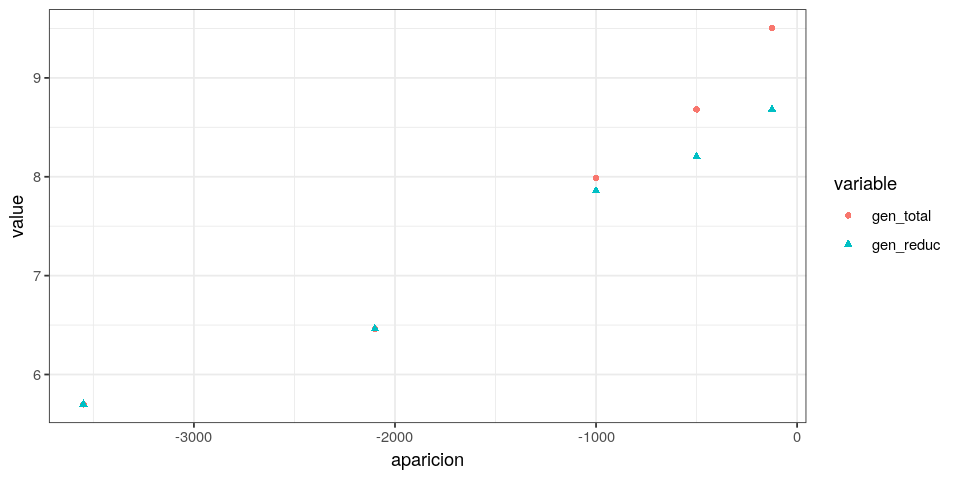

In [53]:
dflog<-df
dflog[,2:3] <- log10(dflog[,2:3])
dflog
dfm<-melt(dflog,id=c("especie","aparicion"))
#dfm
ggplot(data=dfm,aes(x=aparicion,y=value))+geom_point(aes(shape=variable,color=variable))+theme_bw()

In [56]:
model_total <- lm(data=dflog, formula=gen_total ~ aparicion)
summary(model_total)


Call:
lm(formula = gen_total ~ aparicion, data = dflog)

Residuals:
       1        2        3        4        5 
 0.37584 -0.03573 -0.18043 -0.49530  0.33562 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.266749   0.290574  31.891 6.78e-05 ***
aparicion   0.001099   0.000152   7.235  0.00545 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4215 on 3 degrees of freedom
Multiple R-squared:  0.9458,	Adjusted R-squared:  0.9277 
F-statistic: 52.35 on 1 and 3 DF,  p-value: 0.005446


In [57]:
model_reduc <- lm(data=dflog, formula=gen_reduc ~ aparicion)
summary(model_reduc)


Call:
lm(formula = gen_reduc ~ aparicion, data = dflog)

Residuals:
       1        2        3        4        5 
 0.11643 -0.02685  0.07147 -0.34422  0.18317 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.676e+00  1.648e-01   52.65 1.51e-05 ***
aparicion   8.902e-04  8.618e-05   10.33  0.00194 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.239 on 3 degrees of freedom
Multiple R-squared:  0.9727,	Adjusted R-squared:  0.9635 
F-statistic: 106.7 on 1 and 3 DF,  p-value: 0.001936


In [ ]:
# log( Nº genes ) = 0.0008902 * Ma_aparicion + 8.67
#  Ma_aparicion = (log( Nº genes ) - 8.67) / 0.0008902

In [65]:
coef <- model_reduc$coefficients
(2-coef[1])/coef[2]

(Intercept) 
  -7499.344

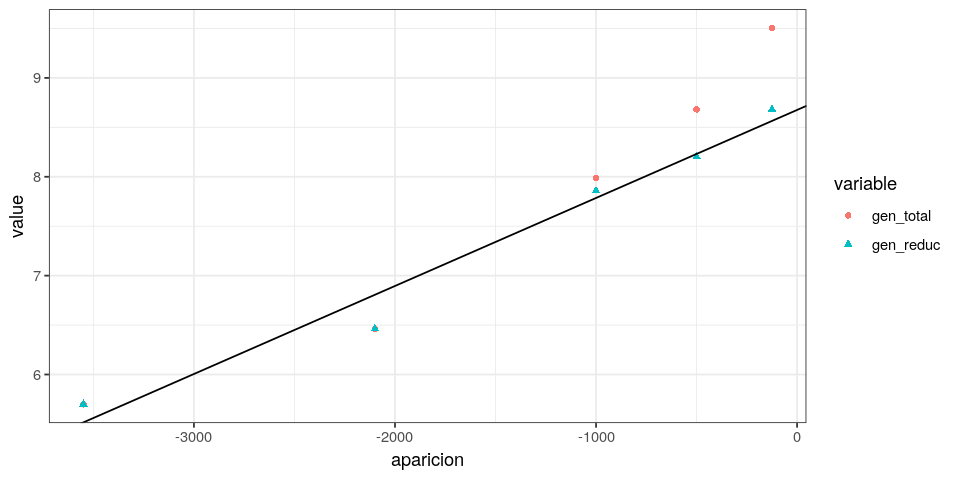

In [68]:
ggplot(data=dfm,aes(x=aparicion,y=value))+
geom_point(aes(shape=variable,color=variable))+theme_bw()+
geom_abline(intercept = coef[1], slope=coef[2])

Otra forma:

In [66]:
model_reduc2 <- lm(data=dflog, formula=aparicion ~ gen_reduc )
summary(model_reduc2)


Call:
lm(formula = aparicion ~ gen_reduc, data = dflog)

Residuals:
      1       2       3       4       5 
 -90.84   55.46  -65.64  358.45 -257.43 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -9519.2      789.6  -12.05  0.00123 **
gen_reduc     1092.6      105.8   10.33  0.00194 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 264.8 on 3 degrees of freedom
Multiple R-squared:  0.9727,	Adjusted R-squared:  0.9635 
F-statistic: 106.7 on 1 and 3 DF,  p-value: 0.001936


In [ ]:
#  Ma_aparicion = 1092.6 * log10( Nº genes ) - 9519.2

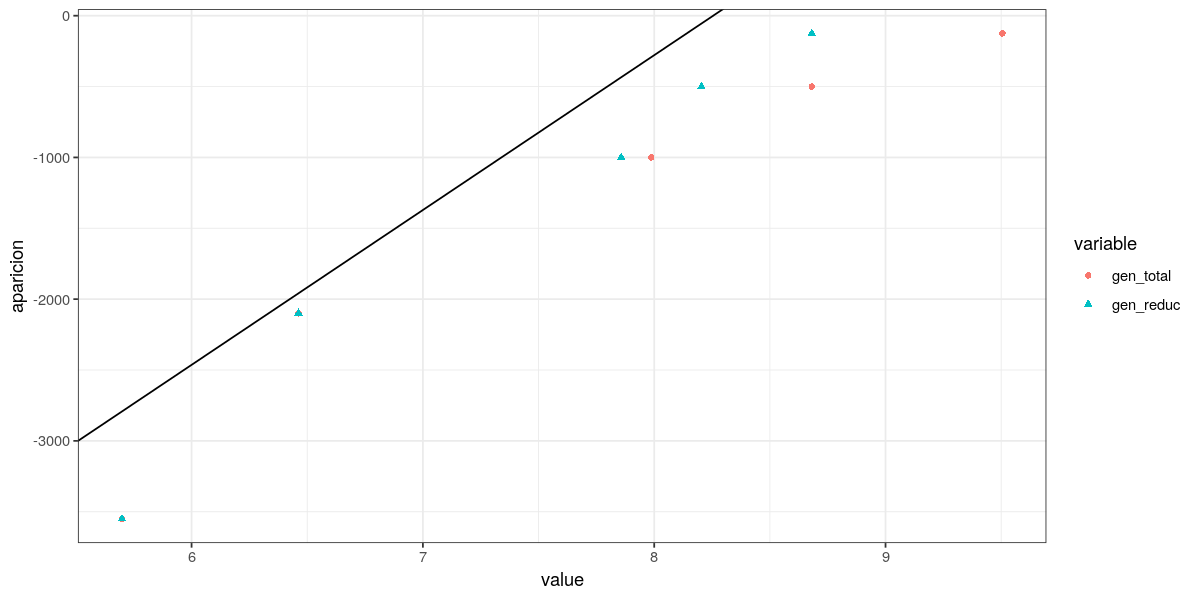

In [77]:
options(repr.plot.height=5,repr.plot.width=10)


ggplot(data=dfm,aes(x=value,y=aparicion))+
geom_point(aes(shape=variable,color=variable))+theme_bw()+
geom_abline(intercept = model_reduc2$coef[1]+500, slope=model_reduc2$coef[2])

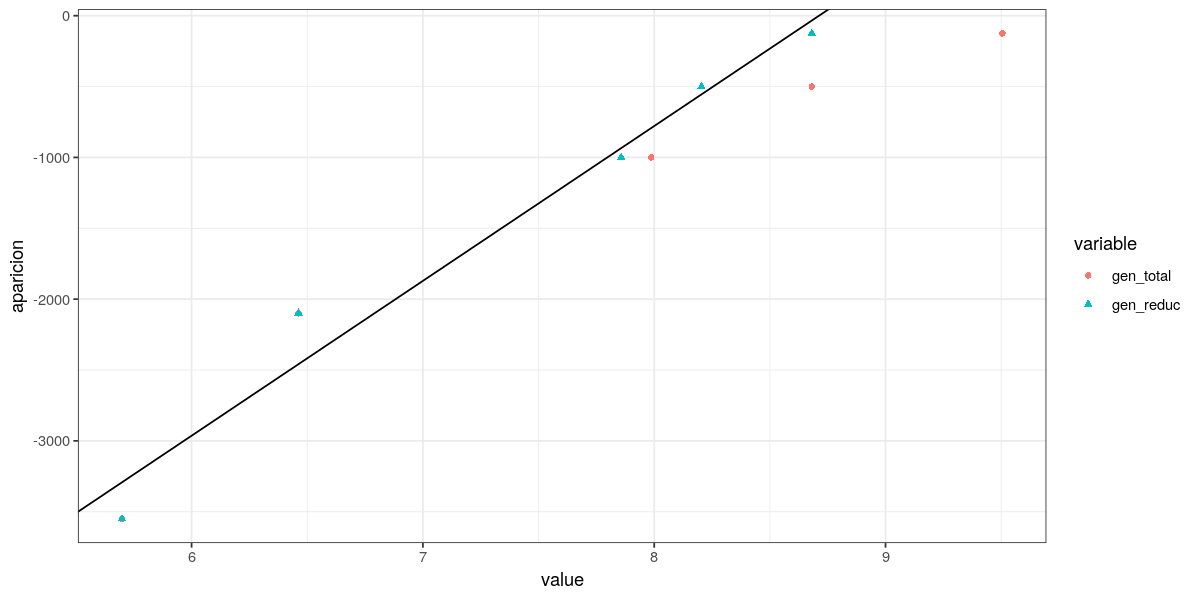

In [74]:
ggplot(data=dfm,aes(x=value,y=aparicion))+
geom_point(aes(shape=variable,color=variable))+theme_bw()+
geom_abline(intercept = model_reduc2$coef[1], slope=model_reduc2$coef[2])